## Introduction to *polars-bio* features

### Interval operations illustrated

Please note that for visualizaiton of the intervals we used [plot_intervals](https://bioframe.readthedocs.io/en/latest/api-vis.html#module-bioframe.vis) method from [Bioframe](https://bioframe.readthedocs.io/) package.

In [1]:
import polars_bio as pb
import pandas as pd
import polars as pl
import bioframe as bf

In [2]:
cols = ["contig", "pos_start", "pos_end"]

In [3]:
df1 = pd.DataFrame(
    [["chr1", 1, 5], ["chr1", 3, 8], ["chr1", 8, 10], ["chr1", 12, 14]],
    columns=["chrom", "start", "end"],
)

df2 = pd.DataFrame(
    [["chr1", 4, 8], ["chr1", 10, 11]], columns=["chrom", "start", "end"]
)

In [4]:
display(df1)

,chrom,start,end
0,chr1,1,5
1,chr1,3,8
2,chr1,8,10
3,chr1,12,14


In [5]:
display(df2)

,chrom,start,end
0,chr1,4,8
1,chr1,10,11


#### Overlap

In [6]:
overlapping_intervals = pb.overlap(df1, df2, output_type="pandas.DataFrame")

In [7]:
display(overlapping_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2
0,chr1,1,5,chr1,4,8
1,chr1,3,8,chr1,4,8
2,chr1,8,10,chr1,4,8
3,chr1,8,10,chr1,10,11


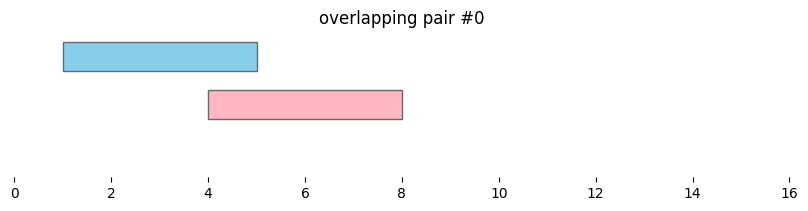

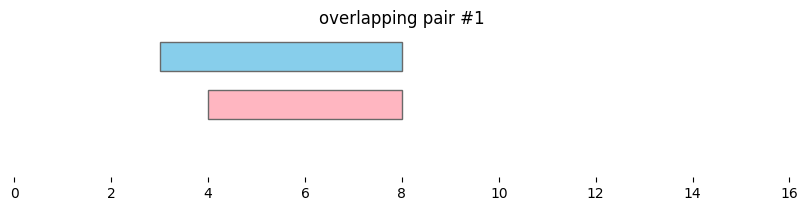

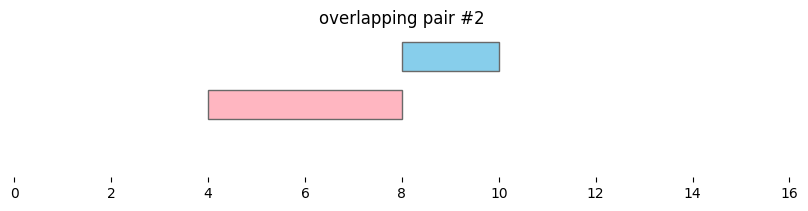

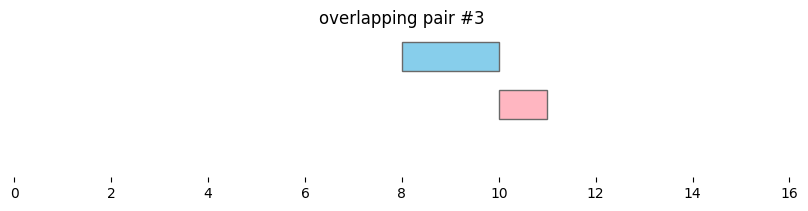

In [8]:
pb.visualize_intervals(overlapping_intervals)

#### Nearest

In [9]:
nearest_intervals = pb.nearest(df1, df2, output_type="pandas.DataFrame")

In [10]:
display(nearest_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,4,8,0
1,chr1,3,8,chr1,4,8,0
2,chr1,8,10,chr1,4,8,0
3,chr1,12,14,chr1,10,11,1


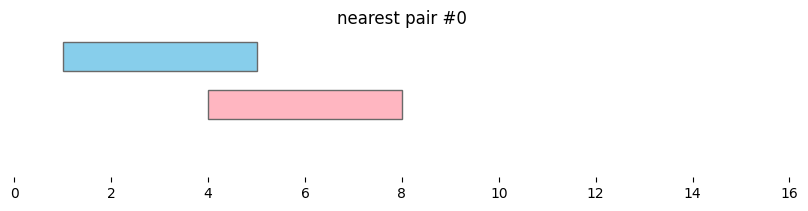

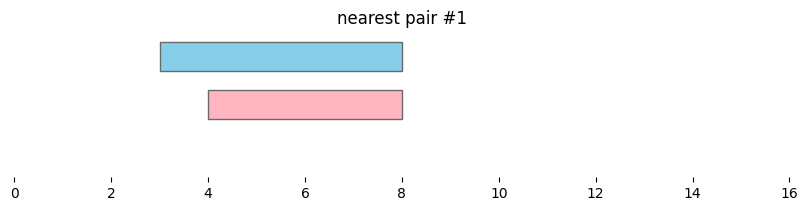

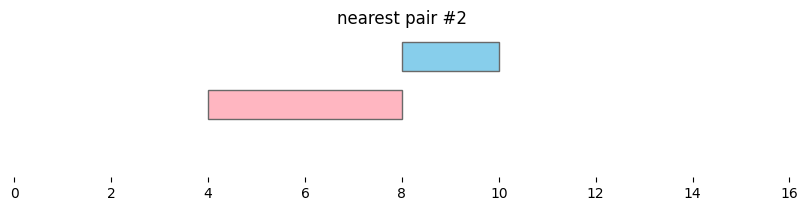

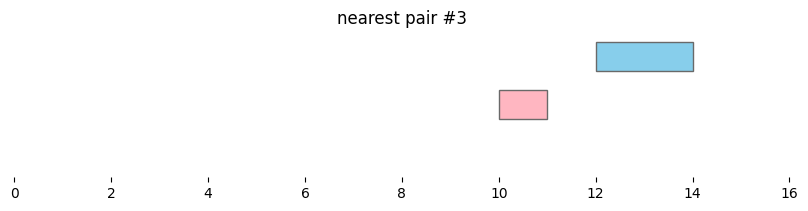

In [11]:
pb.visualize_intervals(nearest_intervals, "nearest pair")

#### Count overlaps

In [12]:
count_overlaps = pb.count_overlaps(df1, df2, output_type="pandas.DataFrame")

In [13]:
display(count_overlaps)

,chrom,start,end,count
0,chr1,1,5,1
1,chr1,3,8,1
2,chr1,8,10,2
3,chr1,12,14,0


#### Coverage

In [14]:
coverage = pb.coverage(df1, df2, output_type="pandas.DataFrame")

In [15]:
display(coverage)

,chrom,start,end,coverage
0,chr1,1,5,2
1,chr1,3,8,4
2,chr1,8,10,2
3,chr1,12,14,0


#### Merge

In [16]:
merge = pb.merge(df1,output_type="pandas.DataFrame")

In [17]:
display(merge)

,chrom,start,end,n_intervals
0,chr1,1,10,3
1,chr1,12,14,1


### Reading bioinformatics data

#### GFF

##### Basic reading with attributes unnesting

In [18]:
gff = pb.scan_gff("../data/example.gff3.bgz")

In [19]:
gff.limit(3).collect()

0rows [00:00, ?rows/s]

chrom,start,end,type,source,score,strand,phase,attributes
str,u32,u32,str,str,f32,str,u32,list[struct[2]]
"""chr1""",11869,14409,"""gene""","""HAVANA""",null,"""+""",null,"[{""ID"",""ENSG00000223972.5""}, {""gene_id"",""ENSG00000223972.5""}, … {""havana_gene"",""OTTHUMG00000000961.2""}]"
"""chr1""",11869,14409,"""transcript""","""HAVANA""",null,"""+""",null,"[{""ID"",""ENST00000456328.2""}, {""Parent"",""ENSG00000223972.5""}, … {""havana_transcript"",""OTTHUMT00000362751.1""}]"
"""chr1""",11869,12227,"""exon""","""HAVANA""",null,"""+""",null,"[{""ID"",""exon:ENST00000456328.2:1""}, {""Parent"",""ENST00000456328.2""}, … {""havana_transcript"",""OTTHUMT00000362751.1""}]"


##### Unnesting attributes

In [20]:
gff = pb.scan_gff("../data/example.gff3.bgz").select(["start", "end", "ID", "havana_transcript"])

In [21]:
gff.limit(3).collect()

0rows [00:00, ?rows/s]

start,end,ID,havana_transcript
u32,u32,str,str
11869,14409,"""ENSG00000223972.5""",null
11869,14409,"""ENST00000456328.2""","""OTTHUMT00000362751.1"""
11869,12227,"""exon:ENST00000456328.2:1""","""OTTHUMT00000362751.1"""


#### VCF

In [22]:
pb.scan_vcf("../data/example.vcf").limit(3).collect()

0rows [00:00, ?rows/s]

chrom,start,end,id,ref,alt,qual,filter,csq
str,u32,u32,str,str,str,f64,str,list[str]
"""chr21""",26960070,26960070,"""rs116645811""","""G""","""A""",null,"""""","[""A|missense_variant|MODERATE|MRPL39|ENSG00000154719|Transcript|ENST00000307301|protein_coding|10/11||||1043|1001|334|T/M|aCg/aTg|||-1||HGNC|14027"", ""A|intron_variant|MODIFIER|MRPL39|ENSG00000154719|Transcript|ENST00000352957|protein_coding||9/9||||||||||-1||HGNC|14027"", ""A|upstream_gene_variant|MODIFIER|LINC00515|ENSG00000260583|Transcript|ENST00000567517|antisense|||||||||||4432|-1||HGNC|16019""]"
"""chr21""",26965148,26965148,"""rs1135638""","""G""","""A""",null,"""""","[""A|synonymous_variant|LOW|MRPL39|ENSG00000154719|Transcript|ENST00000307301|protein_coding|8/11||||939|897|299|G|ggC/ggT|||-1||HGNC|14027"", ""A|synonymous_variant|LOW|MRPL39|ENSG00000154719|Transcript|ENST00000352957|protein_coding|8/10||||939|897|299|G|ggC/ggT|||-1||HGNC|14027"", ""A|synonymous_variant|LOW|MRPL39|ENSG00000154719|Transcript|ENST00000419219|protein_coding|8/8||||876|867|289|G|ggC/ggT|||-1|cds_end_NF|HGNC|14027""]"


##### Get info fields available in the VCF file

In [24]:
pb.describe_vcf("../data/example.vcf").sort("name")

name,type,description
str,str,str
"""CSQ""","""String""","""Consequence annotations from E…"


In [26]:
pb.scan_vcf("../data/example.vcf", info_fields=[]).limit(3).collect()

0rows [00:00, ?rows/s]

chrom,start,end,id,ref,alt,qual,filter
str,u32,u32,str,str,str,f64,str
"""chr21""",26960070,26960070,"""rs116645811""","""G""","""A""",null,""""""
"""chr21""",26965148,26965148,"""rs1135638""","""G""","""A""",null,""""""


#### FASTQ

In [27]:
pb.scan_fastq("../data/example.fastq.gz").limit(3).collect()

0rows [00:00, ?rows/s]

name,description,sequence,quality_scores
str,str,str,str
"""SRR9130495.1""","""D00236:723:HG32CBCX2:1:1108:13…","""NCAATACAAAAGCAATATGGGAGAAGCTAC…","""#4BDFDFFHGHGGJJJHIIIIGGIIJGJJG…"
"""SRR9130495.2""","""D00236:723:HG32CBCX2:1:1108:14…","""NGTCAAAGATAAGATCAAAAGGCACTGGCT…","""#1=DDDDD>DHFH@EFHHGHGGFGIIIGIG…"
"""SRR9130495.3""","""D00236:723:HG32CBCX2:1:1108:17…","""GTTTTCCTCTGGTTATTTCTAGGTACACTG…","""@@@DDDFFHHHFHBHIIGJIJIIJIIIEHG…"


#### BAM

In [28]:
pb.scan_bam("../data/example.bam").limit(3).collect()

0rows [00:00, ?rows/s]

name,chrom,start,end,flags,cigar,mapping_quality,mate_chrom,mate_start,sequence,quality_scores
str,str,u32,u32,u32,str,u32,str,u32,str,str
"""20FUKAAXX100202:1:21:2075:1360…","""chr1""",1,101,1187,"""101M""",0,"""chr1""",178,"""TAACCCTAACCCTAACCCTAACCCTAACCC…","""?>=>?@CBC@BBCCDABACCDABBB9:788…"
"""20FUKAAXX100202:1:21:2733:1836…","""chr1""",1,101,1123,"""101M""",0,"""chr1""",183,"""TAACCCTAACCCTAACCCTAACCCTAACCC…","""CCDACCDCDABBDCDABBDCDABBDCDABB…"
"""20FUKAAXX100202:1:22:19822:802…","""chr1""",1,101,163,"""101M""",4,"""chr1""",35,"""TAACCCTAACCCTAACCCTAACCCTAACCC…","""@CC?@@CBC@BBCCDABBCCDABBCCDABB…"


#### BED

In [29]:
pb.scan_bed("../data/example.bed.bgz").limit(3).collect()

0rows [00:00, ?rows/s]

chrom,start,end,name
str,u32,u32,str
"""chr16""",14800001,16800000,"""FRA16A"""
"""chr16""",66700001,70800000,"""FRA16B"""
"""chr16""",63917503,63934965,"""FRA16C"""


### SQL processing

#### Registering tables

In [30]:
pb.register_gff("../data/example.gff3.bgz", "example_gff")

In [31]:
pb.sql("SHOW TABLES").collect()

0rows [00:00, ?rows/s]

table_catalog,table_schema,table_name,table_type
str,str,str,str
"""datafusion""","""public""","""vcf_schema_2450897014""","""BASE TABLE"""
"""datafusion""","""public""","""s2""","""BASE TABLE"""
"""datafusion""","""public""","""s1""","""BASE TABLE"""
"""datafusion""","""public""","""example_bgz""","""BASE TABLE"""
"""datafusion""","""public""","""example3_bgz""","""BASE TABLE"""
…,…,…,…
"""datafusion""","""information_schema""","""columns""","""VIEW"""
"""datafusion""","""information_schema""","""df_settings""","""VIEW"""
"""datafusion""","""information_schema""","""schemata""","""VIEW"""


##### Querying registered tables

In [32]:
pb.sql("DESCRIBE example_gff").collect()

0rows [00:00, ?rows/s]

column_name,data_type,is_nullable
str,str,str
"""chrom""","""Utf8""","""NO"""
"""start""","""UInt32""","""NO"""
"""end""","""UInt32""","""NO"""
"""type""","""Utf8""","""NO"""
"""source""","""Utf8""","""NO"""
"""score""","""Float32""","""YES"""
"""strand""","""Utf8""","""NO"""
"""phase""","""UInt32""","""YES"""
"""attributes""","""List(Field { name: ""item"", dat…","""YES"""


In [33]:
pb.sql("SELECT start, end, type FROM example_gff WHERE end = 14409").collect()

0rows [00:00, ?rows/s]

start,end,type
u32,u32,str
11869,14409,"""gene"""
11869,14409,"""transcript"""


##### Registering views

In [34]:
pb.register_view("v_example_gff", "SELECT start, end, type FROM example_gff WHERE end = 14409")

In [35]:
pb.sql("SELECT * FROM v_example_gff").collect()

0rows [00:00, ?rows/s]

start,end,type
u32,u32,str
11869,14409,"""gene"""
11869,14409,"""transcript"""


### Working with cloud storage

In [36]:
pb.describe_vcf("gs://gcp-public-data--gnomad/release/4.1/genome_sv/gnomad.v4.1.sv.sites.vcf.gz").filter(pl.col("description").str.contains(r"Latino.* allele frequency"))

name,type,description
str,str,str
"""AF_amr""","""Float""","""Latino allele frequency (biall…"
"""AF_amr_XY""","""Float""","""Latino XY allele frequency (bi…"
"""AF_amr_XX""","""Float""","""Latino XX allele frequency (bi…"


In [37]:
pb.register_vcf("gs://gcp-public-data--gnomad/release/4.1/genome_sv/gnomad.v4.1.sv.sites.vcf.gz", "gnomad", info_fields=['AF_amr'])
query = """
    SELECT
        chrom,
        start,
        end,
        alt,
        array_element(af_amr,1) AS af_amr
    FROM gnomad
    WHERE
        filter = 'HIGH_NCR'
    AND
        alt = '<DUP>'
"""
pb.sql(f"{query} LIMIT 3").collect()

0rows [00:00, ?rows/s]

chrom,start,end,alt,af_amr
str,u32,u32,str,f32
"""chr1""",10000,295666,"""<DUP>""",0.000293
"""chr1""",138000,144000,"""<DUP>""",0.000166
"""chr1""",160500,172100,"""<DUP>""",0.002639


##### Overlapping with a local dataframe

In [38]:
pb.register_vcf("s3://gnomad-public-us-east-1/release/4.1/vcf/exomes/gnomad.exomes.v4.1.sites.chr1.vcf.bgz", "gnomad_sites_chr1", info_fields=[])

In [39]:
pb.sql("SELECT chrom, start, end, alt FROM gnomad_sites_chr1 LIMIT 3").collect()

0rows [00:00, ?rows/s]

chrom,start,end,alt
str,u32,u32,str
"""chr1""",11994,11994,"""C"""
"""chr1""",12016,12016,"""A"""
"""chr1""",12060,12065,"""C"""


In [40]:
pb.register_view("v_gnomad_sites_chr1", "SELECT * FROM gnomad_sites_chr1 LIMIT 20")

In [41]:
pb.sql("SELECT * FROM v_gnomad_sites_chr1").collect()

0rows [00:00, ?rows/s]

chrom,start,end,id,ref,alt,qual,filter
str,u32,u32,str,str,str,f64,str
"""chr1""",11994,11994,"""""","""T""","""C""",null,"""AC0;AS_VQSR"""
"""chr1""",12016,12016,"""""","""G""","""A""",null,"""AC0;AS_VQSR"""
"""chr1""",12060,12065,"""""","""CTGGAG""","""C""",null,"""AC0;AS_VQSR"""
"""chr1""",12074,12074,"""""","""T""","""C""",null,"""AC0;AS_VQSR"""
"""chr1""",12102,12102,"""""","""G""","""A""",null,"""AC0;AS_VQSR"""
…,…,…,…,…,…,…,…
"""chr1""",12198,12198,"""rs62635282""","""G""","""C""",null,"""AS_VQSR"""
"""chr1""",12201,12201,"""""","""C""","""G""",null,"""AS_VQSR"""
"""chr1""",12214,12214,"""rs202068986""","""C""","""G""",null,"""AC0"""


In [42]:
df = pl.DataFrame({
    "chrom": ["chr1", "chr1"],
    "start": [11993, 12102],
    "end": [11996, 12200],
    "annotation": ["ann1", "ann2"]
})
pb.from_polars("test_annotation", df)
pb.sql("SELECT * FROM test_annotation").collect()

0rows [00:00, ?rows/s]

chrom,start,end,annotation
str,i64,i64,str
"""chr1""",11993,11996,"""ann1"""
"""chr1""",12102,12200,"""ann2"""


In [43]:
pb.overlap("v_gnomad_sites_chr1","test_annotation").limit(3).collect()

0rows [00:00, ?rows/s]

chrom_1,start_1,end_1,id_1,ref_1,alt_1,qual_1,filter_1,chrom_2,start_2,end_2,annotation_2
str,u32,u32,str,str,str,f64,str,str,i64,i64,str
"""chr1""",11994,11994,"""""","""T""","""C""",null,"""AC0;AS_VQSR""","""chr1""",11993,11996,"""ann1"""
"""chr1""",12102,12102,"""""","""G""","""A""",null,"""AC0;AS_VQSR""","""chr1""",12102,12200,"""ann2"""
"""chr1""",12106,12106,"""""","""T""","""G""",null,"""AC0;AS_VQSR""","""chr1""",12102,12200,"""ann2"""


### Parallel processing

These demo datasets are from [databio.zip](https://drive.google.com/uc?id=1lctmude31mSAh9fWjI60K1bDrbeDPGfm) benchmark.

In [44]:
pb.set_option("datafusion.execution.target_partitions", "1")

In [47]:
%%time
pb.overlap("../data/ex-rna/*.parquet", "../data/chainRn4/*.parquet",  cols1=cols, cols2=cols).collect().count()

0rows [00:00, ?rows/s]

CPU times: user 3.84 s, sys: 697 ms, total: 4.54 s
Wall time: 4.05 s


contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2
u32,u32,u32,u32,u32,u32
164214743,164214743,164214743,164214743,164214743,164214743


In [48]:
pb.set_option("datafusion.execution.target_partitions", "2")

In [50]:
%%time
pb.overlap("../data/ex-rna/*.parquet", "../data/chainRn4/*.parquet",  cols1=cols, cols2=cols).collect().count()

0rows [00:00, ?rows/s]

CPU times: user 3.95 s, sys: 780 ms, total: 4.73 s
Wall time: 2.05 s


contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2
u32,u32,u32,u32,u32,u32
164214743,164214743,164214743,164214743,164214743,164214743


In [59]:
pb.overlap("../data/ex-rna/*.parquet", "../data/chainRn4/*.parquet",  cols1=cols, cols2=cols).sink_parquet("/tmp/overlap.parquet")

0rows [00:00, ?rows/s]

In [60]:
pl.scan_parquet("/tmp/overlap.parquet").limit(2).collect()

contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2
str,i32,i32,str,i32,i32
"""chr2""",216499331,216501458,"""chr2""",189182485,242806427
"""chr7""",101239611,101245071,"""chr7""",76707011,150558396


In [61]:
pl.scan_parquet("/tmp/overlap.parquet").count().collect()

contig_1,pos_start_1,pos_end_1,contig_2,pos_start_2,pos_end_2
u32,u32,u32,u32,u32,u32
164214743,164214743,164214743,164214743,164214743,164214743


#### Parallel reading of BGZF compressed FASTQ files

In [51]:
%%bash
gsutil cat gs://genomics-public-data/platinum-genomes/fastq/ERR194146.fastq.gz | gunzip -c  | bgzip -c > /tmp/ERR194146.fastq.bgz
cd /tmp && bgzip -r /tmp/ERR194146.fastq.bgz

/opt/homebrew/share/google-cloud-sdk/platform/gsutil/third_party/google-auth-library-python/google/__init__.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [52]:
pb.set_option("datafusion.execution.target_partitions", "1")

In [53]:
%%time
pb.scan_fastq("/tmp/ERR194146.fastq.bgz", parallel=True).count().collect()

0rows [00:00, ?rows/s]

CPU times: user 3.98 s, sys: 307 ms, total: 4.28 s
Wall time: 3.65 s


name,description,sequence,quality_scores
u32,u32,u32,u32
8657652,8657652,8657652,8657652


In [54]:
pb.set_option("datafusion.execution.target_partitions", "2")

In [55]:
%%time
pb.scan_fastq("/tmp/ERR194146.fastq.bgz", parallel=True).count().collect()

0rows [00:00, ?rows/s]

CPU times: user 4.09 s, sys: 292 ms, total: 4.38 s
Wall time: 1.88 s


name,description,sequence,quality_scores
u32,u32,u32,u32
8657652,8657652,8657652,8657652


In [56]:
pb.set_option("datafusion.execution.target_partitions", "4")

In [57]:
%%time
pb.scan_fastq("/tmp/ERR194146.fastq.bgz", parallel=True).count().collect()

0rows [00:00, ?rows/s]

CPU times: user 4.28 s, sys: 306 ms, total: 4.58 s
Wall time: 998 ms


name,description,sequence,quality_scores
u32,u32,u32,u32
8657652,8657652,8657652,8657652


In [58]:
pb.set_option("datafusion.execution.target_partitions", "1")

###